In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import photoevolver as ph

## Planet structure from mass and radius

In [2]:
"""
(1) Create your planet

First, define your planet with some of its known parameters.
For example, you can specify its measured mass and radius.
You must also specify either its orbital period in days,
or its orbital separation in AU.

Here, we create a 2.5 Earth radii planet with a mass of 5 Earth masses,
and a period of 5 days.
"""
planet = ph.Planet(mass = 5.0, radius = 3.0, period = 5)

"""
You can also specify its core mass (or radius) and envelope mass fraction,
instead of its mass and radius.

For instance, this is a planet with a 3 Earth mass core,
and a gaseous envelope consisting of 1% of its mass.
It is also located 0.1 AU from its host star.
`planet = ph.Planet(mcore = 3, fenv = 0.01, sep = 0.1)`

The planet parameters are the following:
    mass     Planet mass in Earth masses
    radius   Planet radius in Earth radii
    mcore    Core mass in Earth masses
    rcore    Core radius in Earth radii
    fenv     Envelope mass fraction, defined as envelope mass over core mass: (mass-mcore)/mcore
    renv     Envelope radius or thickness in Earth radii
    period   Orbital period in days
    sep      Orbital semi-major axis in AU
"""
...

Ellipsis

In [3]:
"""
We then provide the models (functions) that will define the planet's internal structure
as well as its evolution.

The `core_model` is a mass-radius relation for the core.
Given a core mass, it returns its radius.
See `ph.models.core_*` pre-defined models.

The `envelope_model` calculates the envelope thickness `renv`
from its envelope mass fraction.
See `ph.models.envelope_*` pre-defined models.

The `mass_loss_model` returns the mass loss rate in grams/second
given the full list of solved planet parameters.
If left undefined, it will default to no mass loss (a function always returning zero).
See `ph.models.massloss_*` pre-defined models.

The `star_model` defines the XUV evolution of the host star.
It should provide the star's X-ray, EUV, and bolometric luminosities
at any given age, as well as its mass in solar masses.

You can also use a `Mors.Star` instance.
See the Mors module at https://github.com/ColinPhilipJohnstone/Mors
"""

import Mors as mors

star = mors.Star(Mstar = 1.0, percentile = 50.0) # Sun-like star

planet.set_models(
    core  = ph.models.core_otegi20,
    env   = ph.models.envelope_chen16,
    mloss = ph.models.massloss_energy_limited,
    star  = star
)

Planet(mass=5.00, radius=3.00, period=5.00, mcore=None, rcore=None, fenv=None, renv=None)

In [10]:
"""
Now, you can combine the parameters you defined with the given models,
and solve for its internal structure.
If you provided the mass and radius, `photoevolver` will try to
solve the structure models to calculate the core and envelope mass and radius.
The only quantity it needs is the current age of the system in Myr.
"""
structure = planet.solve_structure(age = 100.0) # Myr

"""
With this configuration, at the age of 100 Myr, the models tell us
the planet has a rocky core radius (`rcore`) of 1.64 Earth radii, about 60% of the planet's size,
and a gaseous envelope equal to 1.8% of the planet's core mass (`fenv`).
"""
print(structure)

EvoState(mass=5.0, radius=3.0, mcore=4.912228801756035, rcore=1.6342105693051685, fenv=0.017867896994657392, renv=1.3657894306948315, period=5, sep=0.057224374150792415, mstar=1.0, lx=3.326505637683889e+29, leuv=3.0382796698932085e+29, lbol=2.896278153425812e+33, age=100.0, tstep=None)


## Planet evolution

In [5]:
"""
Now we can evolve the planet's envelope under thermal contraction and evaporation
until the age of 2 Gyr with a fixed step size of 0.1 Myr.
This function `evolve` performs the computation and returns a pandas data frame
with columns for each simulation parameter, and rows that hold the value
of these parameters on each time step.
"""
evo_df = planet.evolve(start=100.0, end=1000.0, step=0.1, progressbar=True)
evo_df

99.978%|██████████████████████████████████████████████████████████████████████████████████████▉| 899.800/900.0 [00:02<00:00]


,mass,radius,mcore,rcore,fenv,renv,period,sep,mstar,lx,leuv,lbol,age,tstep
0,5.000000,3.000000,4.912229,1.634211,0.017868,1.365789,5,0.057224,1.0,3.326506e+29,3.038280e+29,2.896278e+33,100.0,0.1
1,5.000075,3.000596,4.912229,1.634211,0.017883,1.366385,5,0.057224,1.0,3.326506e+29,3.038280e+29,2.896278e+33,100.0,0.1
2,5.000000,2.999933,4.912229,1.634211,0.017868,1.365722,5,0.057224,1.0,3.324234e+29,3.036904e+29,2.896337e+33,100.1,0.1
3,4.999925,2.999271,4.912229,1.634211,0.017853,1.365060,5,0.057224,1.0,3.321963e+29,3.035528e+29,2.896395e+33,100.2,0.1
4,4.999850,2.998610,4.912229,1.634211,0.017837,1.364399,5,0.057224,1.0,3.319692e+29,3.034152e+29,2.896454e+33,100.3,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,4.912229,1.634211,4.912229,1.634211,0.000012,0.233410,5,0.057224,1.0,7.225082e+28,1.112589e+29,3.112056e+33,999.4,0.1
8996,4.912229,1.634211,4.912229,1.634211,0.000012,0.233410,5,0.057224,1.0,7.224111e+28,1.112491e+29,3.112079e+33,999.5,0.1
8997,4.912229,1.634211,4.912229,1.634211,0.000012,0.233410,5,0.057224,1.0,7.223139e+28,1.112392e+29,3.112102e+33,999.6,0.1
8998,4.912229,1.634211,4.912229,1.634211,0.000012,0.233410,5,0.057224,1.0,7.222167e+28,1.112294e+29,3.112125e+33,999.7,0.1


Ellipsis

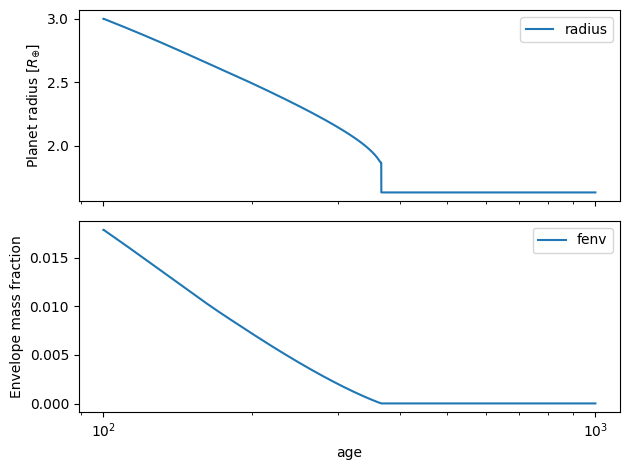

In [6]:
"""
Now we will plot the radius and mass evolution of the planet.
"""

fig, (axr, axm) = plt.subplots(nrows = 2, dpi = 100, sharex = True)

axr.set_xscale('log')
axm.set_xlabel('Age [Myr]')
axr.set_ylabel(r'Planet radius [$R_{\oplus}$]')
axm.set_ylabel(r'Envelope mass fraction')

evo_df.plot('age', 'radius', ax = axr)
evo_df.plot('age', 'fenv', ax = axm)
plt.tight_layout()
            
"""
We see that the planet's atmosphere evaporates completely by the age of 350 Myr.
"""
...

87.333%|█████████████████████████████████████████████████████████████████████████████▋           | 78.600/90.0 [00:00<00:00]/home/jorge/Work/.venv/lib/python3.10/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100.111%|████████████████████████████████████████████████████████████████████████████████████████| 90.100/90.0 [00:00<00:00]


Ellipsis

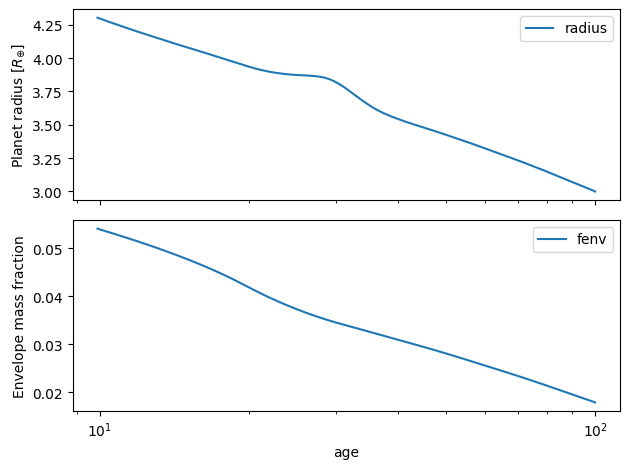

In [8]:
"""
You may also evolve a planet's state backwards by specifying a starting age that is
older than the ending age. For instance, let's evolve backwards from 100 Myr to 10 Myr.
"""
past = planet.evolve(start=100.0, end=10.0, step=0.1, progressbar=True)

fig, (axr, axm) = plt.subplots(nrows = 2, dpi = 100, sharex = True)

axr.set_xscale('log')
axm.set_xlabel('Age [Myr]')
axr.set_ylabel(r'Planet radius [$R_{\oplus}$]')
axm.set_ylabel(r'Envelope mass fraction')

past.plot('age', 'radius', ax = axr)
past.plot('age', 'fenv', ax = axm)
plt.tight_layout()

"""
We find that the planet could originally have started out with a size of 4.3 Earth radii,
and an envelope mass fraction of about 5-6%.

You may then save and load these evolution tracks by using the IO functions defined by Pandas.
"""
# import pandas as pd
# past.to_csv("past_evolution.csv")
# past = pd.read_csv("past_evolution.csv")
...

In [9]:
"""
The evolution code uses the Euler method by default to integrate the models.
This is a fixed-step integrator.

Alternatively, you might use the 4th order Runge-Kutta intergator
by specifying `method = 'rk45'`.
Here, the parameter `step` will indicate both the first and maximum step size.
"""
...

Ellipsis